In [1]:
import os
import numpy as np
import cv2
from PIL import Image
import random
from matplotlib import pyplot as plt
import os.path as osp

In [7]:
base_dir = '/Users/hzzone/Downloads/radar_raw_data/SRAD2018_TRAIN_'
thresh = 80000
s = []
for i in range(1, 11):
    sample_dir = base_dir + str(i).zfill(3)
    for data_id in os.listdir(sample_dir):
        p = os.path.join(sample_dir, data_id)
        img1 = cv2.cvtColor(cv2.imread(osp.join(p, data_id + '_001.png')), cv2.COLOR_BGR2GRAY)
        img1[img1==255] = 0
        img2 = cv2.cvtColor(cv2.imread(osp.join(p, data_id + '_030.png')), cv2.COLOR_BGR2GRAY)
        img2[img2==255] = 0
        if np.sum(img1!=0)>thresh and np.sum(img2!=0)>thresh:
            s.append(p)
            
random.seed(0)
random.shuffle(s)
random.shuffle(s)

In [8]:
len(s)

1819

In [9]:
dataset_size = 1000
data = {'train': s[:int(dataset_size*0.8)], 'test': s[int(dataset_size*0.8):dataset_size]}

In [63]:
def process(s, save_path, size=61):
    if not osp.exists(save_path):
        os.mkdir(save_path)
    for data_path in s:
        data_id = data_path.split('/')[-1]
        imgs = []
        for i in range(size):
            img_file_name = osp.join(data_path, '{}_{}.png'.format(data_id, str(i).zfill(3)))
            try:
                im = cv2.cvtColor(cv2.imread(img_file_name), cv2.COLOR_BGR2GRAY)
            except Exception as e:
                im = np.array(Image.open(img_file_name))
                print(img_file_name, e)
            im[im==255] = 0
            imgs.append(im.astype(np.float32)/80.0)
        seq = np.array(imgs)
        np.save(osp.join(save_path, data_id), seq)

In [64]:
regression_save_path = '/Users/hzzone/Downloads/radar_data_regression'
for phase in ['train', 'test']:
    process(data[phase], osp.join(regression_save_path, phase))

/Users/hzzone/Downloads/radar_raw_data/SRAD2018_TRAIN_004/RAD_296582494212544/RAD_296582494212544_004.png OpenCV(4.0.1) /tmp/opencv-20190105-82821-l4qhq7/opencv-4.0.1/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'

/Users/hzzone/Downloads/radar_raw_data/SRAD2018_TRAIN_004/RAD_296582494212543/RAD_296582494212543_014.png OpenCV(4.0.1) /tmp/opencv-20190105-82821-l4qhq7/opencv-4.0.1/modules/imgproc/src/color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'



In [2]:
# interverls = [0-10, 10-20, 20-30, 30-40, 40-45, 45-50, 50-55, 55-60, 60-80]
interverls = np.array([0, 1, 10, 20, 30, 40, 45, 50, 55, 60, 81])

In [3]:
interverls

array([ 0,  1, 10, 20, 30, 40, 45, 50, 55, 60, 80])

In [15]:
org_data_path = '/Users/hzzone/Downloads/radar_data'
save_path = '/Users/hzzone/Downloads/radar_data_processed'
for phase in ['train', 'test']:
    org_phase_data_path = osp.join(org_data_path, phase)
    for npy_name in os.listdir(org_phase_data_path):
        im = np.load(osp.join(org_phase_data_path, npy_name))
        data_save_path = osp.join(save_path, 'data', phase)
        if not osp.exists(data_save_path):
            os.mkdir(data_save_path)
        np.save(osp.join(data_save_path, npy_name), im[:31, :, :])
        regression_label_save_path = osp.join(save_path, 'regression_label', phase)
        if not osp.exists(regression_label_save_path):
            os.mkdir(regression_label_save_path)
        np.save(osp.join(regression_label_save_path, npy_name), im[31:, :, :])
        
        classification_label_save_path = osp.join(save_path, 'classification_label', phase)
        if not osp.exists(classification_label_save_path):
            os.mkdir(classification_label_save_path)
        label = (im[31:, :, :]*80).astype(np.int32)
        for i in range(len(interverls)-1):
            mask = (label >= interverls[i]) & (label < interverls[i+1])
            label[mask] = i
        np.save(osp.join(classification_label_save_path, npy_name), label)

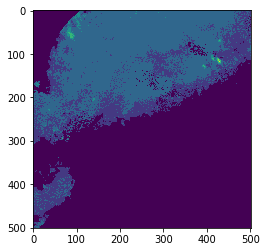

In [16]:
seq = np.load('/Users/hzzone/Downloads/radar_data_processed/classification_label/train/RAD_206482404212544.npy')
plt.imshow(seq[0, :, :])

In [17]:
seq.dtype

dtype('int32')

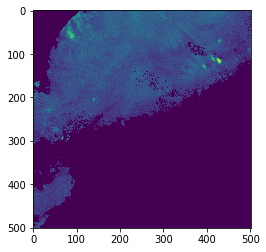

In [18]:
seq = np.load('/Users/hzzone/Downloads/radar_data_processed/regression_label/train/RAD_206482404212544.npy')
plt.imshow(seq[0, :, :])

In [19]:
seq.dtype

dtype('float32')

```python
import cv2
import numpy as np
seq = np.load('/Users/hzzone/Downloads/radar_data/npy/train/RAD_206482404212544.npy')
for i in range(61):
	cv2.imshow('', seq[i, :, :])
	if cv2.waitKey(120) & 0xFF == ord('q'):
		break
```